In [ ]:
# Build Brain Tumor Classification Model with CNN

In [ ]:
# Step 1: Import Required Libraries

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Step 2: Loading and Preprocessing the Image Data

In [4]:
train_dir = 'Dataset/Brain_Tumor/Training'
test_dir = 'Dataset/Brain_Tumor/Testing'

IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2871 images belonging to 4 classes.
Found 395 images belonging to 4 classes.


In [ ]:
# Step 3: Defining the Model’s Architecture

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 148, 148, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 74, 74, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 72, 72, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 36, 36, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 34, 34, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 17, 17, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 36992)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │    4,735,104 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 4)             │          516 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Training the Model

In [15]:
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = test_generator.samples // BATCH_SIZE

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps
)

C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 89s 964ms/step - accuracy: 0.3304 - loss: 1.3430 - val_accuracy: 0.2188 - val_loss: 1.9202
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5000 - loss: 1.0865 - val_accuracy: 0.2727 - val_loss: 1.7288
Epoch 3/10


C:\Program Files\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


89/89 ━━━━━━━━━━━━━━━━━━━━ 61s 684ms/step - accuracy: 0.4859 - loss: 1.1494 - val_accuracy: 0.2917 - val_loss: 2.2720
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.6250 - loss: 0.8439 - val_accuracy: 0.1818 - val_loss: 4.1783
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 67s 749ms/step - accuracy: 0.5583 - loss: 1.0141 - val_accuracy: 0.3385 - val_loss: 2.8230
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.6250 - loss: 0.9999 - val_accuracy: 0.1818 - val_loss: 5.3496
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 69s 772ms/step - accuracy: 0.6310 - loss: 0.8999 - val_accuracy: 0.3099 - val_loss: 4.2832
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.7188 - loss: 0.8161 - val_accuracy: 0.4545 - val_loss: 1.5706
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 69s 775ms/step - accuracy: 0.6549 - loss: 0.8259 - val_accuracy: 0.3568 - val_loss: 3.8320
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6875 - loss: 0.7649 - val_accuracy: 0.4545 - v

In [ ]:
# Step 5: Estimating the Model’s Performance

In [16]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test Accuracy: {test_acc:.4f}')

13/13 - 3s - 196ms/step - accuracy: 0.3494 - loss: 3.7265
Test Accuracy: 0.3494


In [17]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

print(classification_report(true_classes, predicted_classes, target_names=train_generator.class_indices.keys()))

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.31      0.05      0.09       100
meningioma_tumor       0.33      0.03      0.05       115
        no_tumor       0.27      0.86      0.42       105
 pituitary_tumor       0.19      0.11      0.14        75

        accuracy                           0.27       395
       macro avg       0.28      0.26      0.17       395
    weighted avg       0.29      0.27      0.17       395



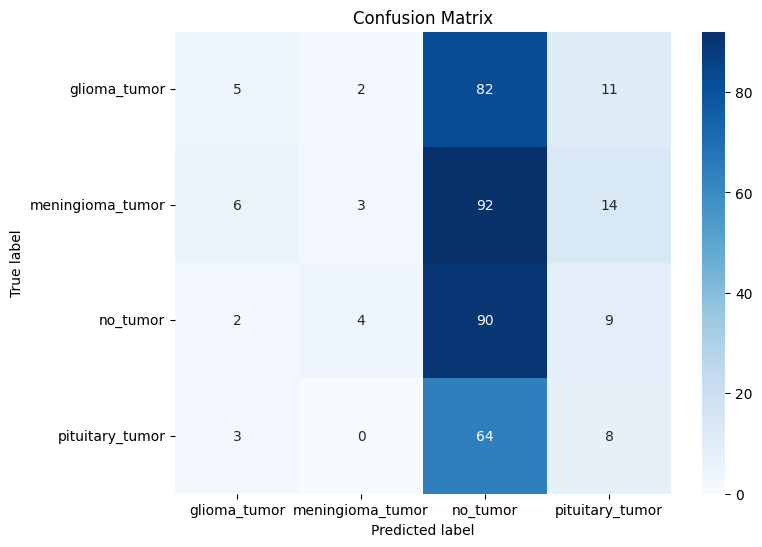

In [24]:
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 6: Visualization of Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


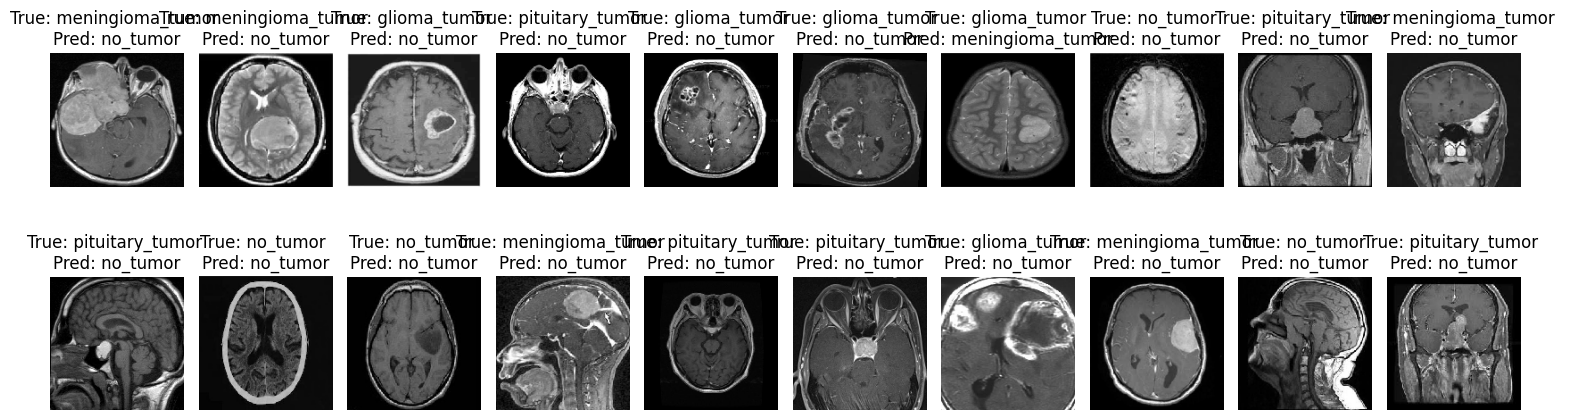

In [27]:
def plot_predictions(generator, num_images=20):
    images, labels = next(generator)
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_classes[i]]} \nPred: {class_names[predicted_classes[i]]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_predictions(test_generator)